In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata = sc.read_h5ad('h5ad/ln_integrated.h5ad')
adata

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


AnnData object with n_obs × n_vars = 33843 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [2]:
bdata = adata[adata.obs['celltype'].isin(['B', 'B-T_Multiplets'])].copy()
bdata

AnnData object with n_obs × n_vars = 15471 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

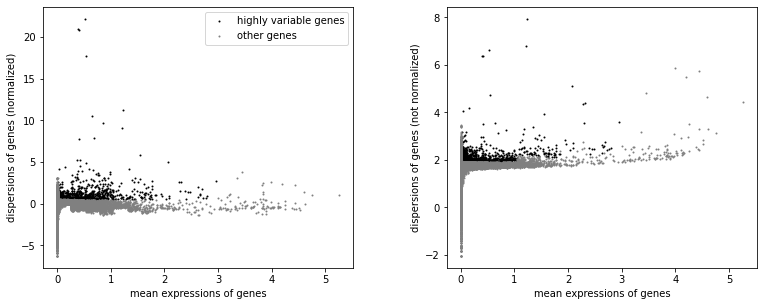

In [3]:
### recompute umap
bdata = bdata.raw.to_adata()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

In [4]:
bdata.raw = bdata

In [5]:
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 15471 × 1473
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [6]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.regress_out(bdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

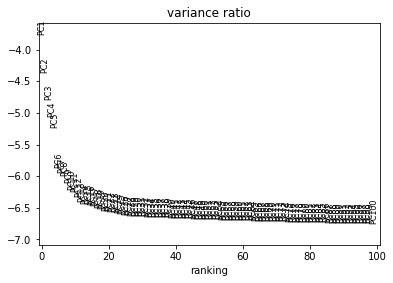

In [7]:
sc.tl.pca(bdata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=100)

In [8]:
sc.external.pp.harmony_integrate(bdata, key = 'sequencing_batch', adjusted_basis='X_pca')

2022-07-20 14:33:38,743 - harmonypy - INFO - Iteration 1 of 10
2022-07-20 14:33:43,804 - harmonypy - INFO - Iteration 2 of 10
2022-07-20 14:33:48,746 - harmonypy - INFO - Converged after 2 iterations


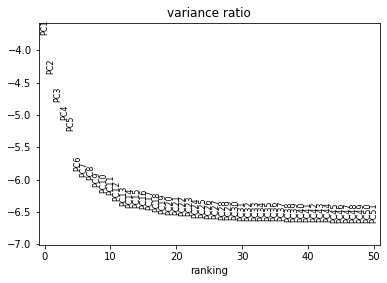

In [9]:
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=50)

In [10]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs = 20)
sc.tl.umap(bdata, min_dist=.3)

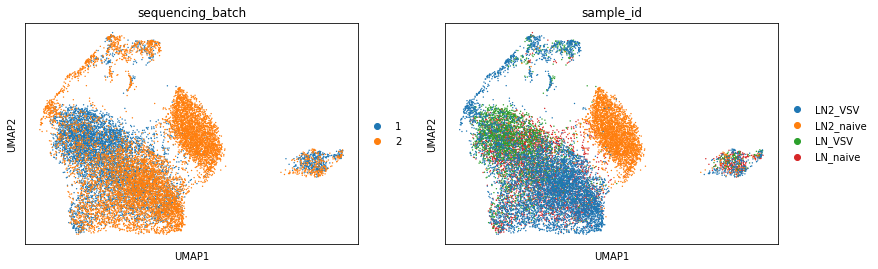

In [11]:
sc.pl.umap(bdata, color=['sequencing_batch', 'sample_id'])

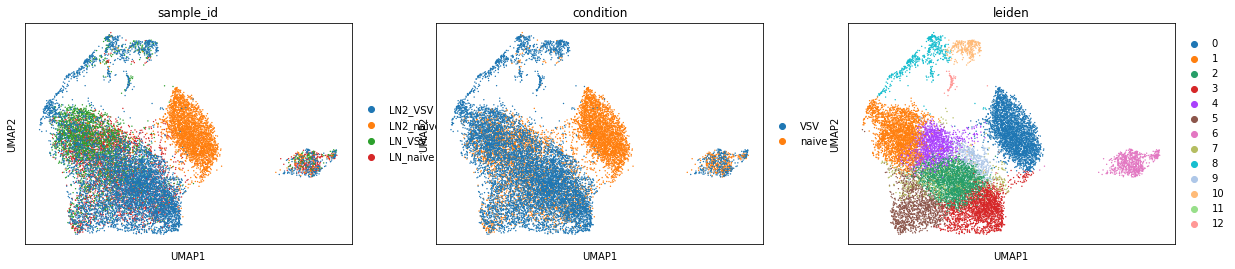

In [12]:
sc.tl.leiden(bdata)
sc.pl.umap(bdata, color=['sample_id', 'condition', 'leiden'])

In [16]:
# sc.tl.leiden(bdata, restrict_to = ('leiden', ['3']), resolution = .5)
# sc.pl.umap(bdata, color=['leiden_R'])

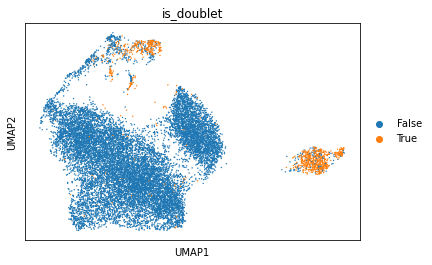

In [17]:
sc.pl.umap(bdata, color=['is_doublet'])

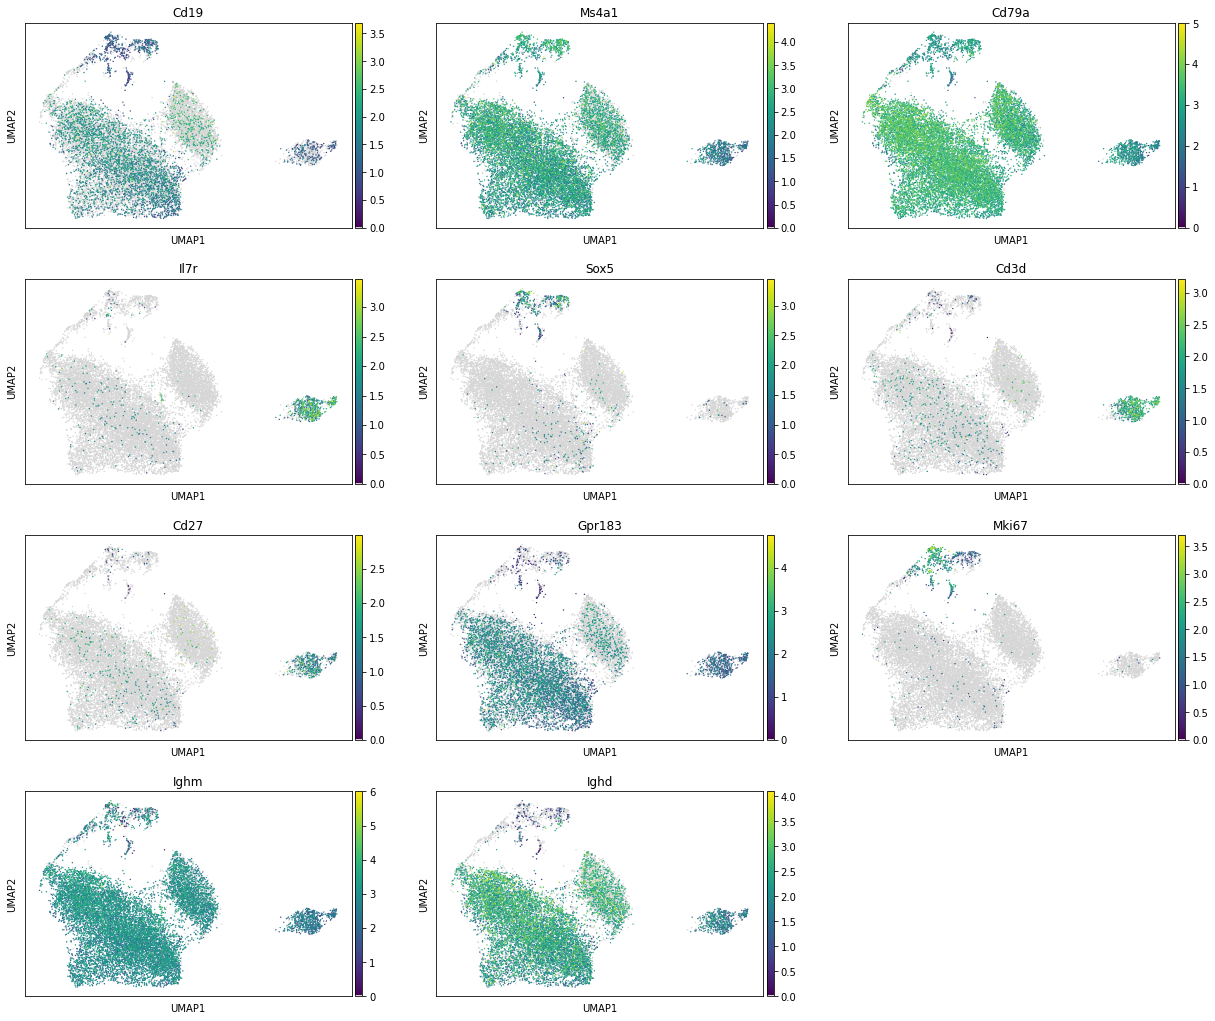

In [18]:
sc.pl.umap(bdata, color = ['Cd19', 'Ms4a1', 'Cd79a', 'Il7r', 'Sox5', 'Cd3d', 'Cd27', 'Gpr183', 'Mki67', 'Ighm', 'Ighd'], color_map = tools.cmp(), ncols = 3)

In [19]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden', method = 'wilcoxon')

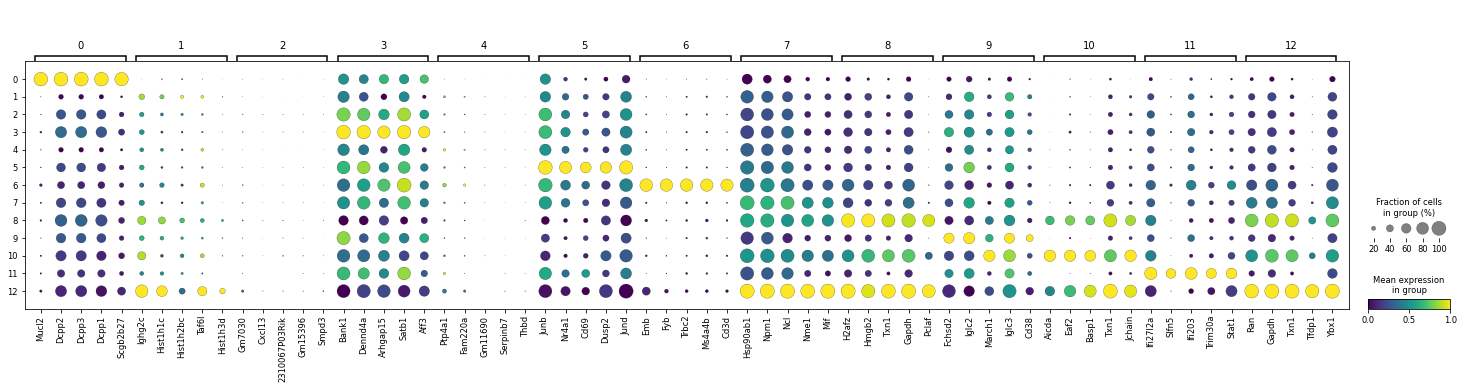

In [20]:
sc.pl.rank_genes_groups_dotplot(bdata, n_genes= 5, 
                                min_logfoldchange = 1, 
                                standard_scale = 'var', 
                                color_map = 'viridis', dendrogram = False)

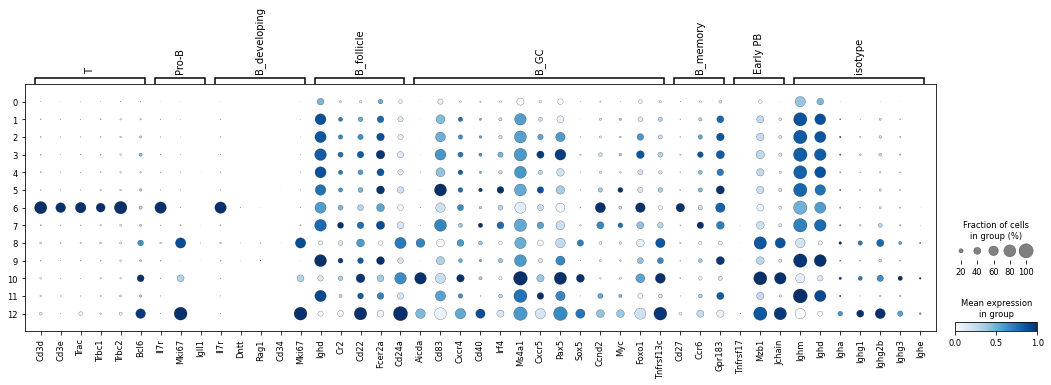

In [21]:
sc.pl.dotplot(bdata, {
    'T':['Cd3d', 'Cd3e', 'Trac', 'Trbc1', 'Trbc2', 'Bcl6'],
    'Pro-B':['Il7r', 'Mki67', 'Igll1'],
    'B_developing':['Il7r', 'Dntt', 'Rag1', 'Cd34', 'Mki67'],
    'B_follicle':['Ighd', 'Cr2', 'Cd22', 'Fcer2a', 'Cd24a'],
    'B_GC':['Aicda', 'Cd83', 'Cxcr4', 'Cd40', 'Irf4', 'Ms4a1', 'Cxcr5', 'Pax5', 'Sox5',  'Ccnd2', 'Myc', 'Foxo1', 'Tnfrsf13c'],
    'B_memory':['Cd27', 'Ccr6','Gpr183'],
    'Early PB':['Tnfrsf17', 'Mzb1', 'Jchain'],
    'isotype':['Ighm', 'Ighd', 'Igha', 'Ighg1', 'Ighg2b', 'Ighg3', 'Ighe']
},
              groupby = 'leiden',
              standard_scale = 'var', 
              color_map = 'Blues',)

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


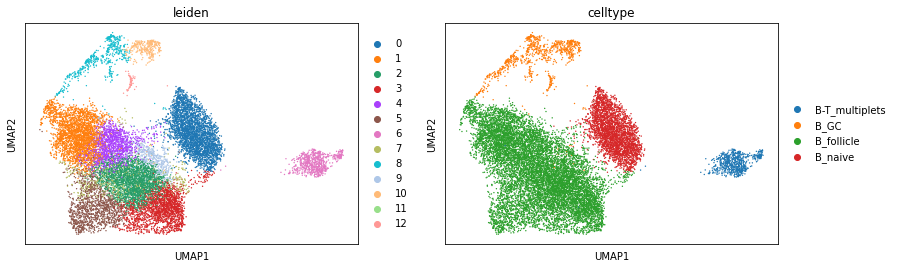

In [23]:
new_dict ={'0':'B_naive',
'1':'B_follicle',
'2':'B_follicle',
'3':'B_follicle',
'4':'B_follicle',
'5':'B_follicle',
'6':'B-T_multiplets',
'7':'B_follicle',
'8':'B_GC',
'9':'B_follicle',
'10':'B_GC',
'11':'B_follicle',
'12':'B_GC',
}
bdata.obs['celltype'] = [new_dict[x] for x in bdata.obs['leiden']]
sc.pl.umap(bdata, color = ['leiden', 'celltype'])

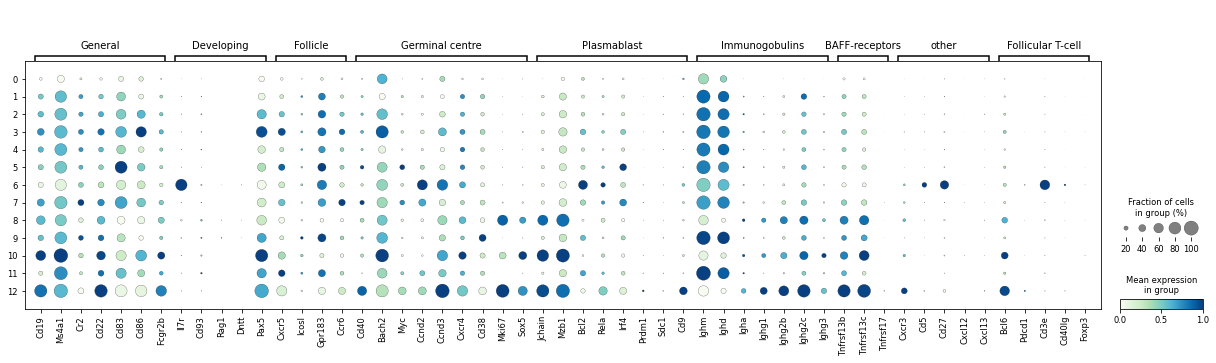

In [24]:
sc.pl.dotplot(bdata, 
              {'General':[ 'Cd19', 'Ms4a1',  'Cr2', 'Cd22', 'Cd83', 'Cd86', 'Fcgr2b'],
               'Developing':['Il7r', 'Cd93', 'Rag1', 'Dntt', 'Pax5'],
               'Follicle':['Cxcr5', 'Icosl', 'Gpr183', 'Ccr6'],
               'Germinal centre':['Cd40', 'Bach2', 'Myc', 'Ccnd2', 'Ccnd3', 'Cxcr4', 'Cd38', 'Mki67', 'Sox5', ],
               'Plasmablast':['Jchain','Mzb1', 'Bcl2', 'Rela', 'Irf4', 'Prdm1', 'Sdc1', 'Cd9',],
               'Immunogobulins':['Ighm', 'Ighd', 'Igha', 'Ighg1','Ighg2b','Ighg2c', 'Ighg3'],
               'BAFF-receptors':['Tnfrsf13b', 'Tnfrsf13c', 'Tnfrsf17'],
               'other':['Cxcr3', 'Cd5', 'Cd27', 'Cxcl12', 'Cxcl13'],
               'Follicular T-cell':['Bcl6', 'Pdcd1', 'Cd3e', 'Cd40lg', 'Foxp3']
              }
              , groupby = 'leiden', color_map = 'GnBu', standard_scale = 'var', var_group_rotation = 0)

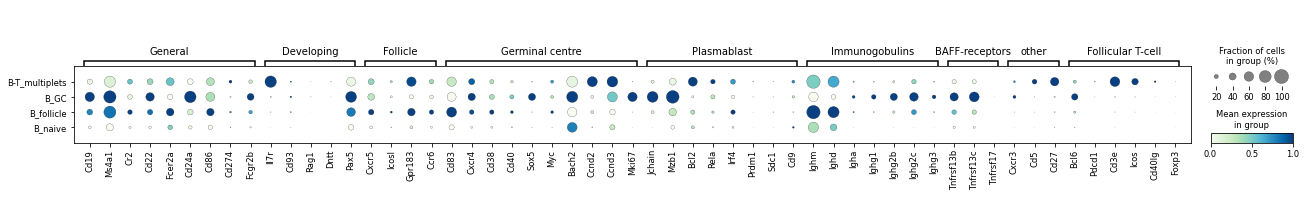

In [25]:
sc.pl.dotplot(bdata, 
              {'General':[ 'Cd19', 'Ms4a1',  'Cr2', 'Cd22', 'Fcer2a', 'Cd24a', 'Cd86', 'Cd274', 'Fcgr2b'],
               'Developing':['Il7r', 'Cd93', 'Rag1', 'Dntt', 'Pax5'],
               'Follicle':['Cxcr5', 'Icosl', 'Gpr183', 'Ccr6'],
               'Germinal centre':['Cd83', 'Cxcr4', 'Cd38', 'Cd40', 'Sox5', 'Myc', 'Bach2', 'Ccnd2', 'Ccnd3', 'Mki67', ],
               'Plasmablast':['Jchain','Mzb1', 'Bcl2', 'Rela', 'Irf4', 'Prdm1', 'Sdc1', 'Cd9',],
               'Immunogobulins':['Ighm', 'Ighd', 'Igha', 'Ighg1','Ighg2b','Ighg2c', 'Ighg3',],
               'BAFF-receptors':['Tnfrsf13b', 'Tnfrsf13c', 'Tnfrsf17',],
               'other':['Cxcr3', 'Cd5', 'Cd27',],
               'Follicular T-cell':['Bcl6', 'Pdcd1', 'Cd3e', 'Icos', 'Cd40lg', 'Foxp3', ]
              }
              , groupby = 'celltype', color_map = 'GnBu', standard_scale = 'var', var_group_rotation = 0)

In [26]:
bdata

AnnData object with n_obs × n_vars = 15471 × 1473
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap', 'sequencing_batch_colors', 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'conne

In [27]:
adata.obs['celltype'] = adata.obs['celltype'].astype(str)
adata.obs['celltype'].update(bdata.obs['celltype'])

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


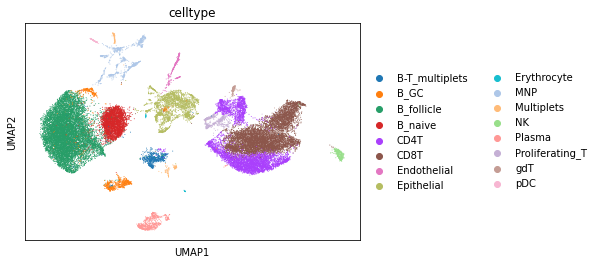

In [28]:
sc.pl.umap(adata, color = 'celltype')

In [29]:
# add the plasma blast

In [30]:
bdata = adata[adata.obs['celltype'].isin(['Plasma'])].copy()
bdata

AnnData object with n_obs × n_vars = 731 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

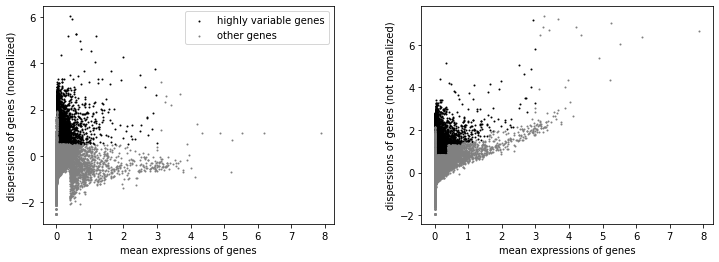

In [31]:
### recompute umap
bdata = bdata.raw.to_adata()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

In [32]:
bdata.raw = bdata

In [33]:
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 731 × 4307
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [34]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.regress_out(bdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

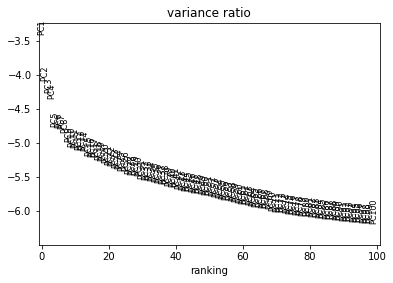

In [35]:
sc.tl.pca(bdata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=100)

In [36]:
sc.external.pp.harmony_integrate(bdata, key = 'sequencing_batch', adjusted_basis='X_pca')

2022-07-20 14:46:15,183 - harmonypy - INFO - Iteration 1 of 10
2022-07-20 14:46:15,305 - harmonypy - INFO - Iteration 2 of 10
2022-07-20 14:46:15,412 - harmonypy - INFO - Iteration 3 of 10
2022-07-20 14:46:15,515 - harmonypy - INFO - Iteration 4 of 10
2022-07-20 14:46:15,615 - harmonypy - INFO - Iteration 5 of 10
2022-07-20 14:46:15,706 - harmonypy - INFO - Iteration 6 of 10
2022-07-20 14:46:15,804 - harmonypy - INFO - Iteration 7 of 10
2022-07-20 14:46:15,854 - harmonypy - INFO - Converged after 7 iterations


In [46]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs = 20)
sc.tl.umap(bdata, min_dist=.3)

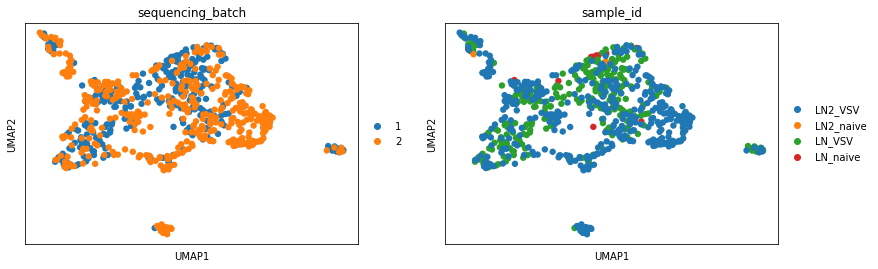

In [47]:
sc.pl.umap(bdata, color=['sequencing_batch', 'sample_id'])

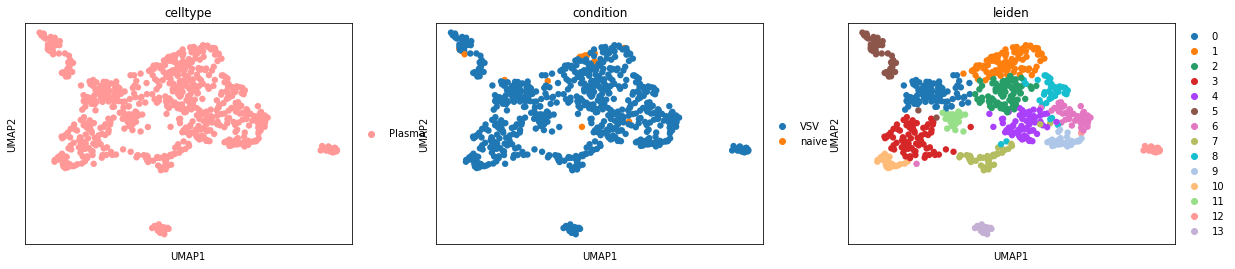

In [48]:
sc.tl.leiden(bdata)
sc.pl.umap(bdata, color=['celltype', 'condition', 'leiden'])

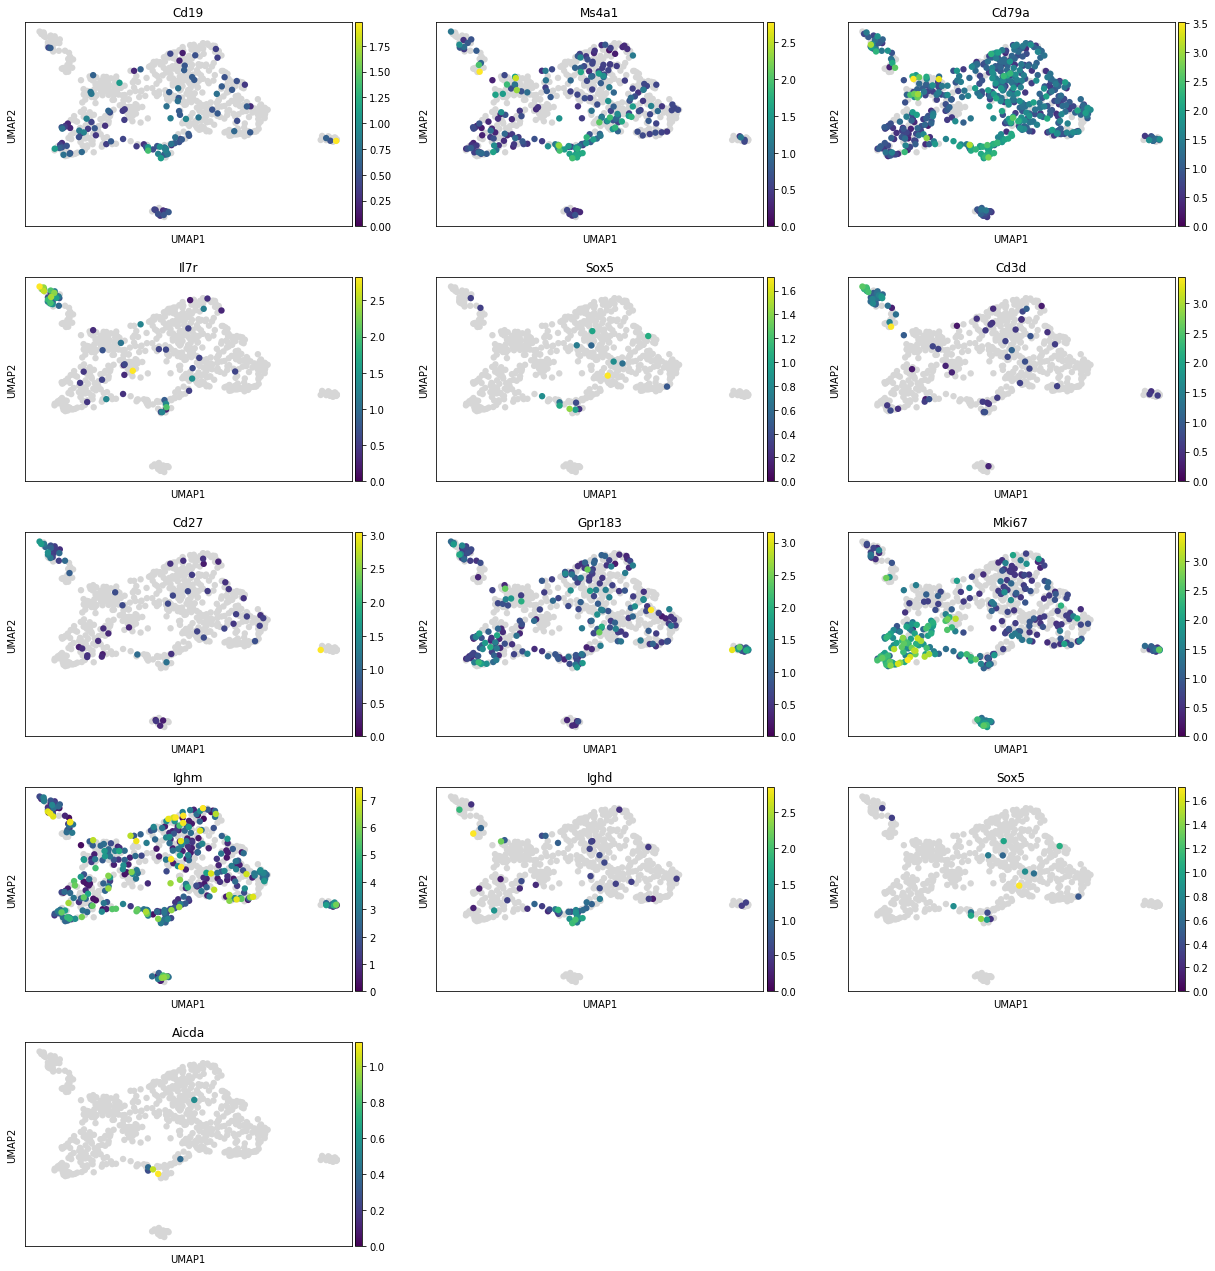

In [49]:
sc.pl.umap(bdata, color = ['Cd19', 'Ms4a1', 'Cd79a', 'Il7r', 'Sox5', 'Cd3d', 'Cd27', 'Gpr183', 'Mki67', 'Ighm', 'Ighd', 'Sox5', 'Aicda'], color_map = tools.cmp(), ncols = 3)

In [50]:
sc.tl.rank_genes_groups(bdata, groupby = 'leiden', method = 'wilcoxon')

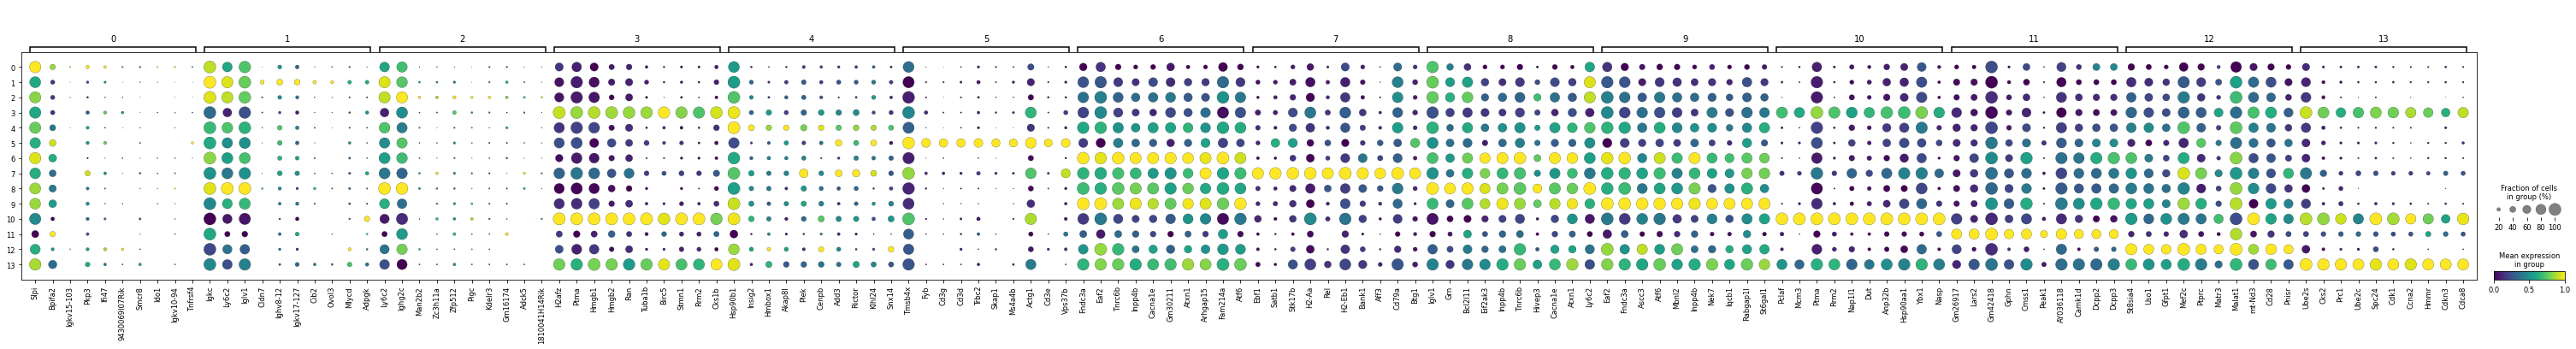

In [53]:
sc.pl.rank_genes_groups_dotplot(bdata, n_genes= 10, 
                                min_logfoldchange = 1, 
                                standard_scale = 'var', 
                                color_map = 'viridis', dendrogram = False)

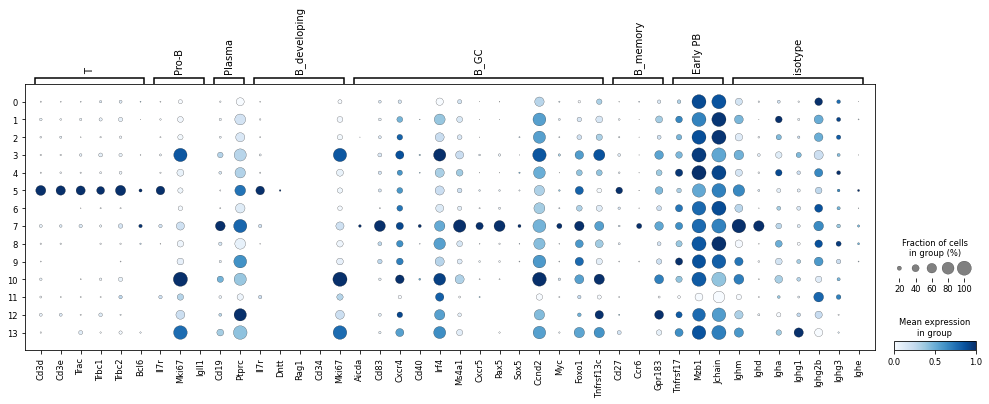

In [54]:
sc.pl.dotplot(bdata, {
    'T':['Cd3d', 'Cd3e', 'Trac', 'Trbc1', 'Trbc2', 'Bcl6'],
    'Pro-B':['Il7r', 'Mki67', 'Igll1'],
    'Plasma':['Cd19', 'Ptprc'],
    'B_developing':['Il7r', 'Dntt', 'Rag1', 'Cd34', 'Mki67'],
    'B_GC':['Aicda', 'Cd83', 'Cxcr4', 'Cd40', 'Irf4', 'Ms4a1', 'Cxcr5', 'Pax5', 'Sox5',  'Ccnd2', 'Myc', 'Foxo1', 'Tnfrsf13c'],
    'B_memory':['Cd27', 'Ccr6','Gpr183'],
    'Early PB':['Tnfrsf17', 'Mzb1', 'Jchain'],
    'isotype':['Ighm', 'Ighd', 'Igha', 'Ighg1', 'Ighg2b', 'Ighg3', 'Ighe']
},
              groupby = 'leiden',
              standard_scale = 'var', 
              color_map = 'Blues',)

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


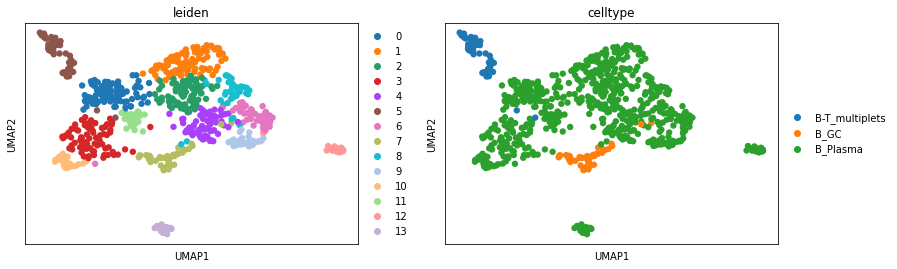

In [55]:
new_dict ={'0':'B_Plasma',
'1':'B_Plasma',
'2':'B_Plasma',
'3':'B_Plasma',
'4':'B_Plasma',
'5':'B-T_multiplets',
'6':'B_Plasma',
'7':'B_GC',
'8':'B_Plasma',
'9':'B_Plasma',
'10':'B_Plasma',
'11':'B_Plasma',
'12':'B_Plasma',
'13':'B_Plasma',
}
bdata.obs['celltype'] = [new_dict[x] for x in bdata.obs['leiden']]
sc.pl.umap(bdata, color = ['leiden', 'celltype'])

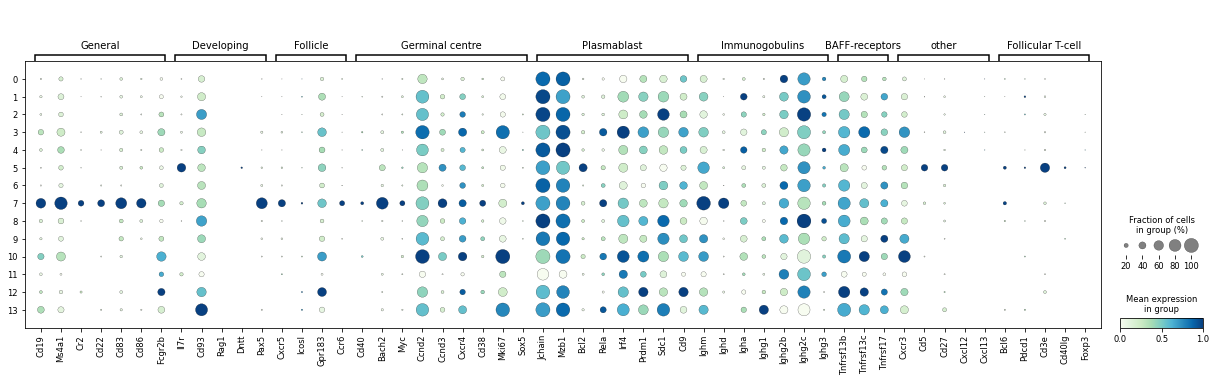

In [56]:
sc.pl.dotplot(bdata, 
              {'General':[ 'Cd19', 'Ms4a1',  'Cr2', 'Cd22', 'Cd83', 'Cd86', 'Fcgr2b'],
               'Developing':['Il7r', 'Cd93', 'Rag1', 'Dntt', 'Pax5'],
               'Follicle':['Cxcr5', 'Icosl', 'Gpr183', 'Ccr6'],
               'Germinal centre':['Cd40', 'Bach2', 'Myc', 'Ccnd2', 'Ccnd3', 'Cxcr4', 'Cd38', 'Mki67', 'Sox5', ],
               'Plasmablast':['Jchain','Mzb1', 'Bcl2', 'Rela', 'Irf4', 'Prdm1', 'Sdc1', 'Cd9',],
               'Immunogobulins':['Ighm', 'Ighd', 'Igha', 'Ighg1','Ighg2b','Ighg2c', 'Ighg3'],
               'BAFF-receptors':['Tnfrsf13b', 'Tnfrsf13c', 'Tnfrsf17'],
               'other':['Cxcr3', 'Cd5', 'Cd27', 'Cxcl12', 'Cxcl13'],
               'Follicular T-cell':['Bcl6', 'Pdcd1', 'Cd3e', 'Cd40lg', 'Foxp3']
              }
              , groupby = 'leiden', color_map = 'GnBu', standard_scale = 'var', var_group_rotation = 0)

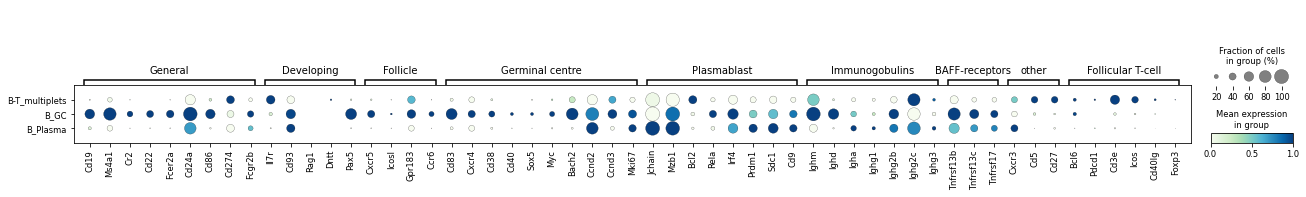

In [57]:
sc.pl.dotplot(bdata, 
              {'General':[ 'Cd19', 'Ms4a1',  'Cr2', 'Cd22', 'Fcer2a', 'Cd24a', 'Cd86', 'Cd274', 'Fcgr2b'],
               'Developing':['Il7r', 'Cd93', 'Rag1', 'Dntt', 'Pax5'],
               'Follicle':['Cxcr5', 'Icosl', 'Gpr183', 'Ccr6'],
               'Germinal centre':['Cd83', 'Cxcr4', 'Cd38', 'Cd40', 'Sox5', 'Myc', 'Bach2', 'Ccnd2', 'Ccnd3', 'Mki67', ],
               'Plasmablast':['Jchain','Mzb1', 'Bcl2', 'Rela', 'Irf4', 'Prdm1', 'Sdc1', 'Cd9',],
               'Immunogobulins':['Ighm', 'Ighd', 'Igha', 'Ighg1','Ighg2b','Ighg2c', 'Ighg3',],
               'BAFF-receptors':['Tnfrsf13b', 'Tnfrsf13c', 'Tnfrsf17',],
               'other':['Cxcr3', 'Cd5', 'Cd27',],
               'Follicular T-cell':['Bcl6', 'Pdcd1', 'Cd3e', 'Icos', 'Cd40lg', 'Foxp3', ]
              }
              , groupby = 'celltype', color_map = 'GnBu', standard_scale = 'var', var_group_rotation = 0)

In [58]:
bdata

AnnData object with n_obs × n_vars = 731 × 4307
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap', 'sequencing_batch_colors', 'condition_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connect

In [59]:
adata.obs['celltype'] = adata.obs['celltype'].astype(str)
adata.obs['celltype'].update(bdata.obs['celltype'])

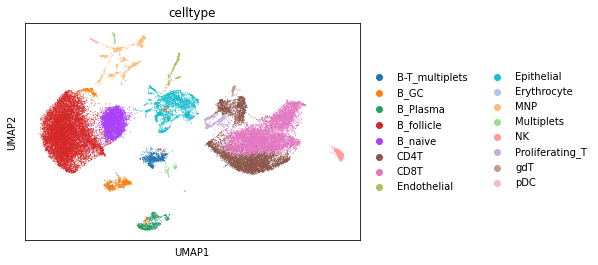

In [61]:
sc.pl.umap(adata, color = 'celltype')

In [ ]:
## final check

In [62]:
bdata = adata[adata.obs['celltype'].isin(['B_Plasma', 'B_GC', 'B-T_multiplets', 'B_follicle', 'B_naive'])].copy()
bdata

AnnData object with n_obs × n_vars = 16202 × 1903
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

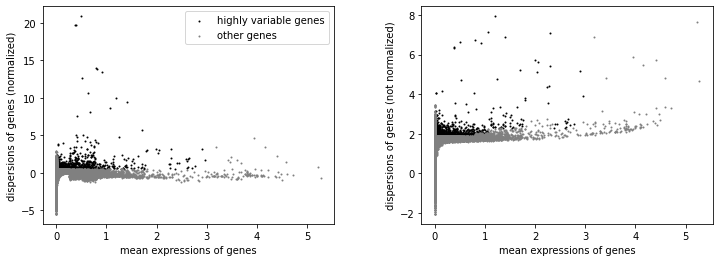

In [63]:
### recompute umap
bdata = bdata.raw.to_adata()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(bdata)

In [64]:
bdata.raw = bdata

In [65]:
bdata = bdata[:, bdata.var.highly_variable].copy()
bdata

AnnData object with n_obs × n_vars = 16202 × 1492
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'celltype', 'leiden_R'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

In [66]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'])
sc.pp.regress_out(bdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(bdata, max_value=10)

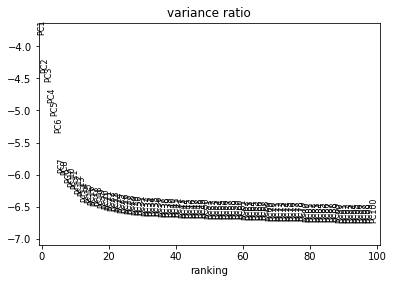

In [67]:
sc.tl.pca(bdata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs=100)

In [68]:
sc.external.pp.harmony_integrate(bdata, key = 'sequencing_batch', adjusted_basis='X_pca')

2022-07-20 14:53:29,202 - harmonypy - INFO - Iteration 1 of 10
2022-07-20 14:53:35,141 - harmonypy - INFO - Iteration 2 of 10
2022-07-20 14:53:40,809 - harmonypy - INFO - Converged after 2 iterations


In [70]:
sc.pp.neighbors(bdata, n_neighbors=10, n_pcs = 20)
sc.tl.umap(bdata, min_dist=.3)

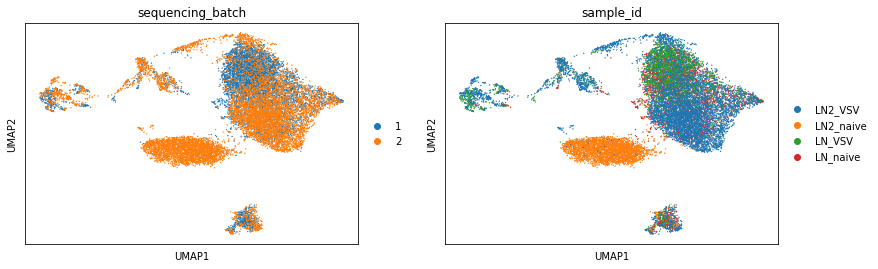

In [71]:
sc.pl.umap(bdata, color=['sequencing_batch', 'sample_id'])

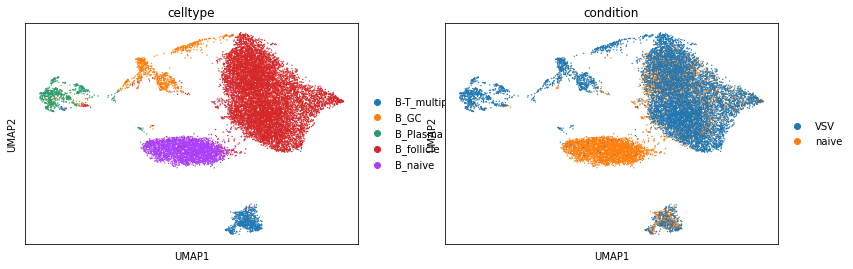

In [72]:
# sc.tl.leiden(bdata)
sc.pl.umap(bdata, color=['celltype', 'condition'])

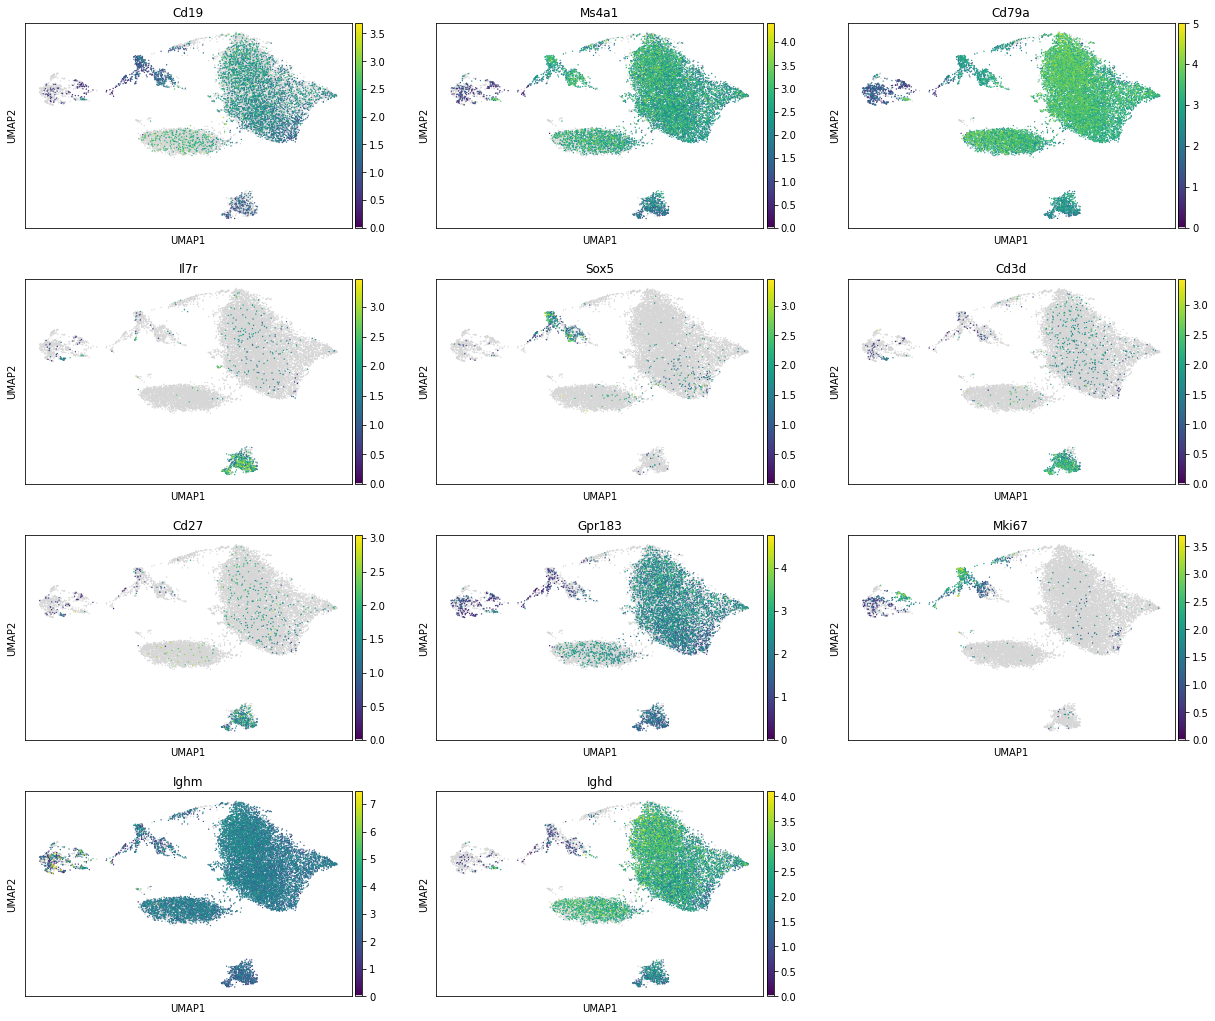

In [73]:
sc.pl.umap(bdata, color = ['Cd19', 'Ms4a1', 'Cd79a', 'Il7r', 'Sox5', 'Cd3d', 'Cd27', 'Gpr183', 'Mki67', 'Ighm', 'Ighd'], color_map = tools.cmp(), ncols = 3)

In [74]:
sc.tl.rank_genes_groups(bdata, groupby = 'celltype', method = 'wilcoxon')

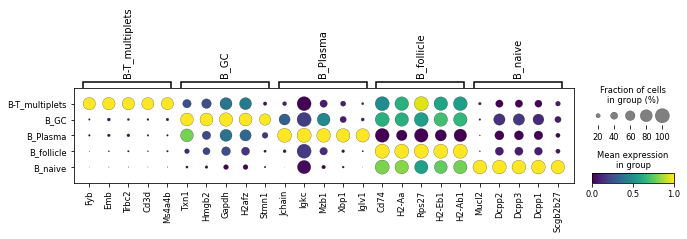

In [75]:
sc.pl.rank_genes_groups_dotplot(bdata, n_genes= 5, 
                                min_logfoldchange = 1, 
                                standard_scale = 'var', 
                                color_map = 'viridis', dendrogram = False)

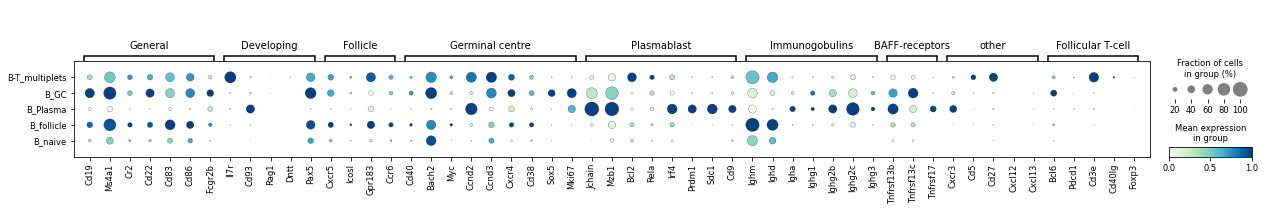

In [76]:
sc.pl.dotplot(bdata, 
              {'General':[ 'Cd19', 'Ms4a1',  'Cr2', 'Cd22', 'Cd83', 'Cd86', 'Fcgr2b'],
               'Developing':['Il7r', 'Cd93', 'Rag1', 'Dntt', 'Pax5'],
               'Follicle':['Cxcr5', 'Icosl', 'Gpr183', 'Ccr6'],
               'Germinal centre':['Cd40', 'Bach2', 'Myc', 'Ccnd2', 'Ccnd3', 'Cxcr4', 'Cd38', 'Sox5', 'Mki67',],
               'Plasmablast':['Jchain','Mzb1', 'Bcl2', 'Rela', 'Irf4', 'Prdm1', 'Sdc1', 'Cd9',],
               'Immunogobulins':['Ighm', 'Ighd', 'Igha', 'Ighg1','Ighg2b','Ighg2c', 'Ighg3'],
               'BAFF-receptors':['Tnfrsf13b', 'Tnfrsf13c', 'Tnfrsf17'],
               'other':['Cxcr3', 'Cd5', 'Cd27', 'Cxcl12', 'Cxcl13'],
               'Follicular T-cell':['Bcl6', 'Pdcd1', 'Cd3e', 'Cd40lg', 'Foxp3']
              }
              , groupby = 'celltype', color_map = 'GnBu', standard_scale = 'var', var_group_rotation = 0)

In [78]:
adata.write_h5ad('h5ad/ln_integrated.h5ad', compression = 'gzip')

In [77]:
bdata.write_h5ad('h5ad/ln_integrated_b_cells.h5ad', compression = 'gzip')